In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:/Downloads/Downloads/Mall_Customers.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Uni variate Analysis

In [5]:
data.drop('CustomerID',axis=1,inplace=True)

In [6]:
pd.crosstab(data['Gender'],columns=1)

col_0,1
Gender,
Female,112
Male,88


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data["Gender"]=le.fit_transform(data["Gender"])

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

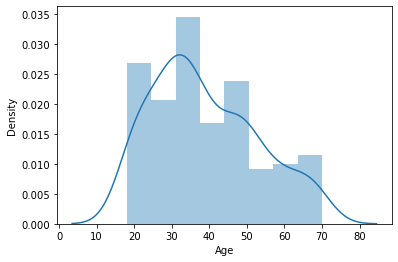

In [9]:
sns.distplot(data['Age'])

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

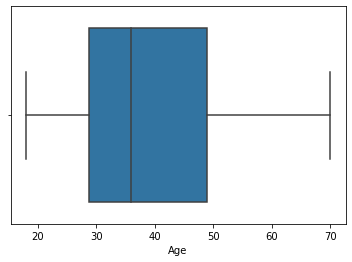

In [10]:
sns.boxplot(data['Age'])

the following visualizations shows that the histogram is positively skewed and the boxplot shows there are no outliers in the variable the mean of the variable is 38.850000 the standard deviation is 13.969007	

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

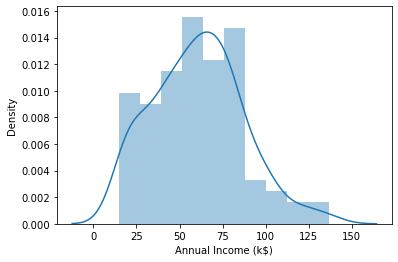

In [11]:
sns.distplot(data['Annual Income (k$)'])

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income (k$)'>

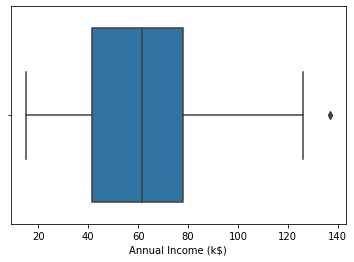

In [12]:
sns.boxplot(data['Annual Income (k$)'])

the following visualizations shows that the histogram is negatively skewed and the boxplot shows there is a outlier in the variable the mean of the variable is 60.560000 the standard deviation is 26.264721		

In [13]:
outlier=np.quantile(data.iloc[:,2],0.75)+1.5*((np.quantile(data.iloc[:,2],0.75)-np.quantile(data.iloc[:,2],0.25)))
outlier

132.75

In [14]:
median=data["Annual Income (k$)"].median()
median

61.5

In [15]:
data.loc[data['Annual Income (k$)']>outlier]=median

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income (k$)'>

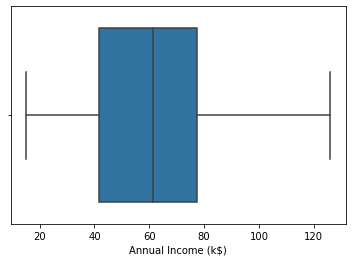

In [16]:
sns.boxplot(data['Annual Income (k$)'])

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

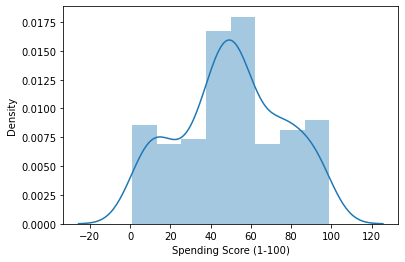

In [17]:
sns.distplot(data['Spending Score (1-100)'])

C:\Users\Jeffery\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Spending Score (1-100)'>

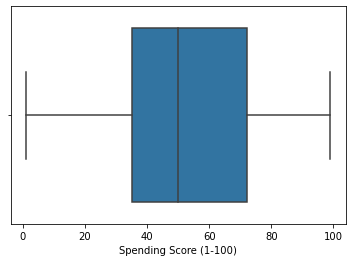

In [18]:
sns.boxplot(data['Spending Score (1-100)'])

In [19]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.164266,0.008752,0.039049
Age,0.164266,1.000000,0.005433,-0.317888
Annual Income (k$),0.008752,0.005433,1.000000,0.010369
Spending Score (1-100),0.039049,-0.317888,0.010369,1.000000


<AxesSubplot:>

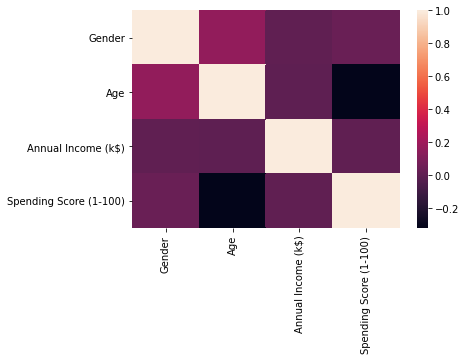

In [20]:
sns.heatmap(data.corr())

the following visualizations shows that the histogram is not skewed and the boxplot shows there are no outliers in the variable the mean of the variable is 50.200000 the standard deviation is 50.200000		

In [21]:
X=data.iloc[:,0:4]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19.0,15.0,39.0
1,1.0,21.0,15.0,81.0
2,0.0,20.0,16.0,6.0
3,0.0,23.0,16.0,77.0
4,0.0,31.0,17.0,40.0
...,...,...,...,...
195,0.0,35.0,120.0,79.0
196,0.0,45.0,126.0,28.0
197,1.0,32.0,126.0,74.0
198,61.5,61.5,61.5,61.5


## Importing k-Means Clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Wcss')

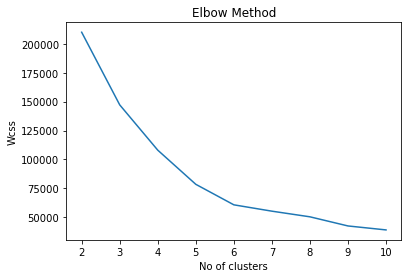

In [23]:
wcss=[]
sil=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("Wcss")

In [24]:
sil

[0.28974026633869854,
 0.3700332316729034,
 0.39928424315228894,
 0.4395875290614841,
 0.4493790974840397,
 0.43057570646286725,
 0.4000679958411931,
 0.42459008905271217,
 0.3834898864853164]

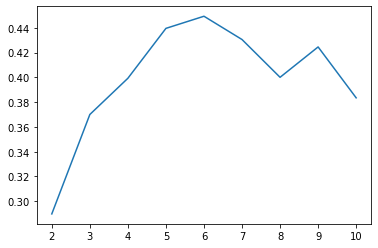

In [25]:
plt.plot(range(2,11),sil)

In [26]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)

In [27]:
label=kmeans.fit_predict(X)

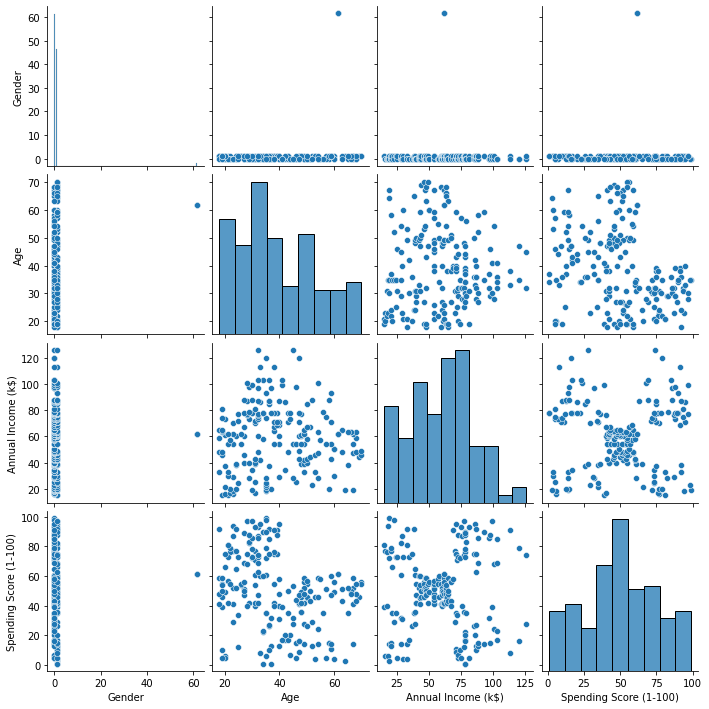

In [28]:
sns.pairplot(X)

Text(0, 0.5, 'Spending Score (1-100)')

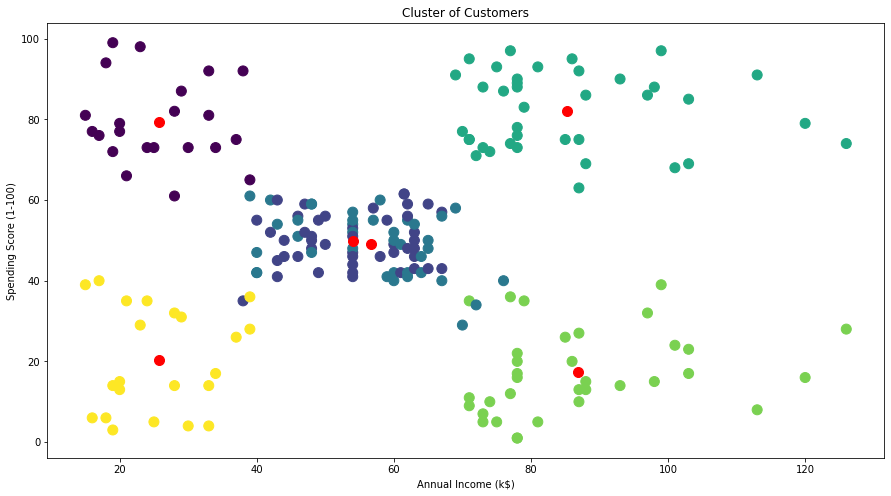

In [29]:
plt.figure(figsize=(15,8))
scat1=plt.scatter(X.values[:,2],X.values[:,3],s=100,c=label)
scat2=plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c='red',label="Centroids")
plt.title("Cluster of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [30]:
x=X.iloc[:,1].values
y=X.iloc[:,2].values
z=X.iloc[:,3].values

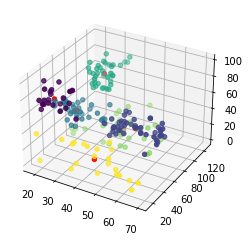

In [31]:
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=label)
ax.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color="red")

# Gaussian mixture model

In [32]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture()

In [34]:
gm.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)